In [3]:
!pip install python_speech_features 

  Preparing metadata (setup.py) ... done
  Created wheel for python_speech_features: filename=python_speech_features-0.6-py3-none-any.whl size=5870 sha256=0c28dfeaa4cd66001015a2950487480635a2866d5cae271c42bf7c7f90c2655b
  Stored in directory: /root/.cache/pip/wheels/5a/9e/68/30bad9462b3926c29e315df16b562216d12bdc215f4d240294
Successfully built python_speech_features


In [54]:
pip install pydub


Note: you may need to restart the kernel to use updated packages.


In [57]:
import numpy as np
import pandas as pd
import pandas as pd
from pydub import AudioSegment
import matplotlib.pyplot as plt
import scipy.io.wavfile as wav
from python_speech_features import mfcc
import seaborn as sns
import librosa.display
import librosa
from tempfile import TemporaryFile
from sklearn.preprocessing import normalize

import os
import math
import pickle
import random
import operator

from importlib import reload
plt=reload(plt)

data, sr = librosa.load('/kaggle/input/gtzan-dataset-music-genre-classification/Data/genres_original/blues/blues.00000.wav')

In [5]:
music_data = pd.read_csv('/kaggle/input/gtzan-dataset-music-genre-classification/Data/features_30_sec.csv')
music_data.head(5)

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,...,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,blues.00001.wav,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,...,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
2,blues.00002.wav,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,...,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
3,blues.00003.wav,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,...,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
4,blues.00004.wav,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,...,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues


In [6]:
music_data['label'].value_counts()

label
blues        100
classical    100
country      100
disco        100
hiphop       100
jazz         100
metal        100
pop          100
reggae       100
rock         100
Name: count, dtype: int64

# **EDA**

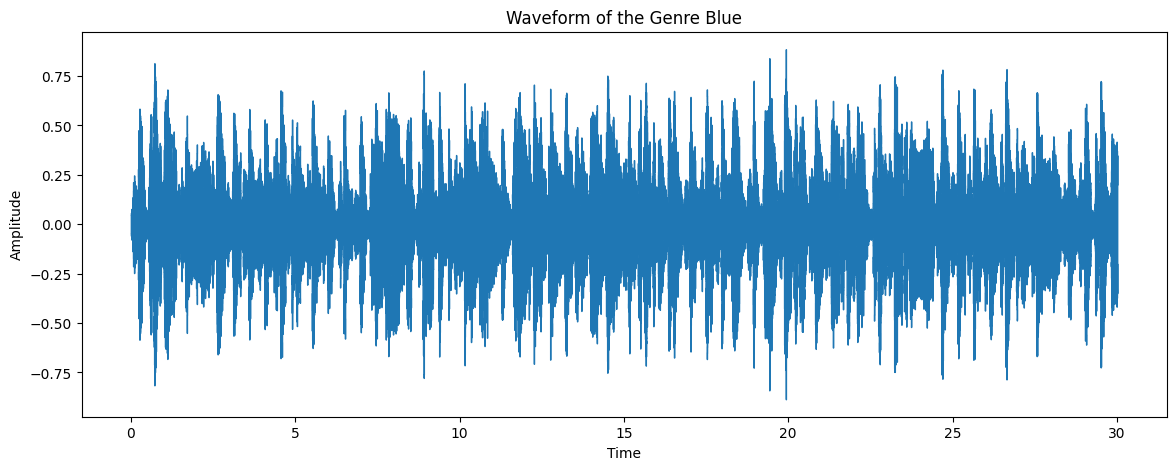

In [7]:
path = '/kaggle/input/gtzan-dataset-music-genre-classification/Data/genres_original/blues/blues.00000.wav'
plt.figure(figsize=(14, 5))
x, sr = librosa.load(path)
librosa.display.waveshow(x, sr=sr)

plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Waveform of the Genre Blue')
plt.show()

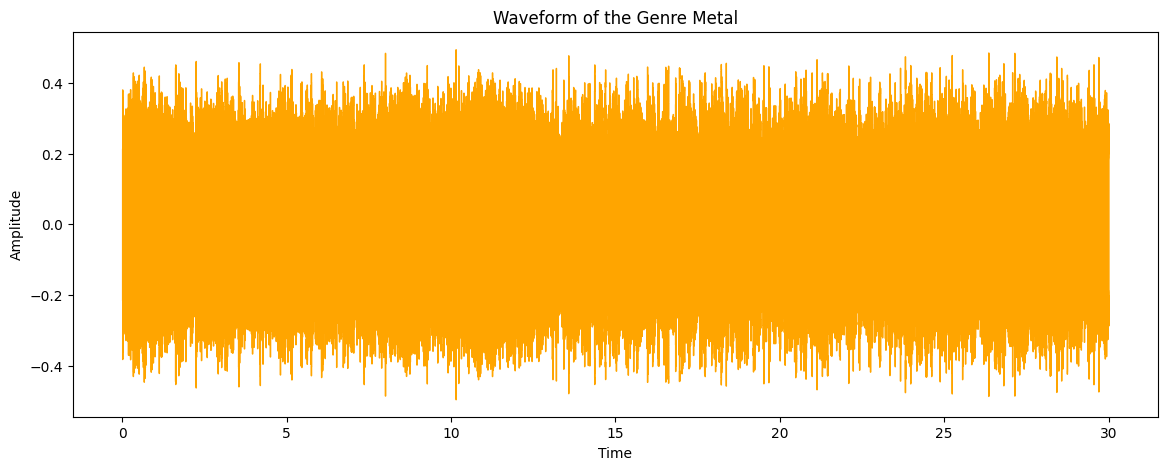

In [8]:
path = '/kaggle/input/gtzan-dataset-music-genre-classification/Data/genres_original/metal/metal.00000.wav'
plt.figure(figsize=(14, 5))
x, sr = librosa.load(path)
librosa.display.waveshow(x, sr=sr, color='orange')

plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Waveform of the Genre Metal')
plt.show()

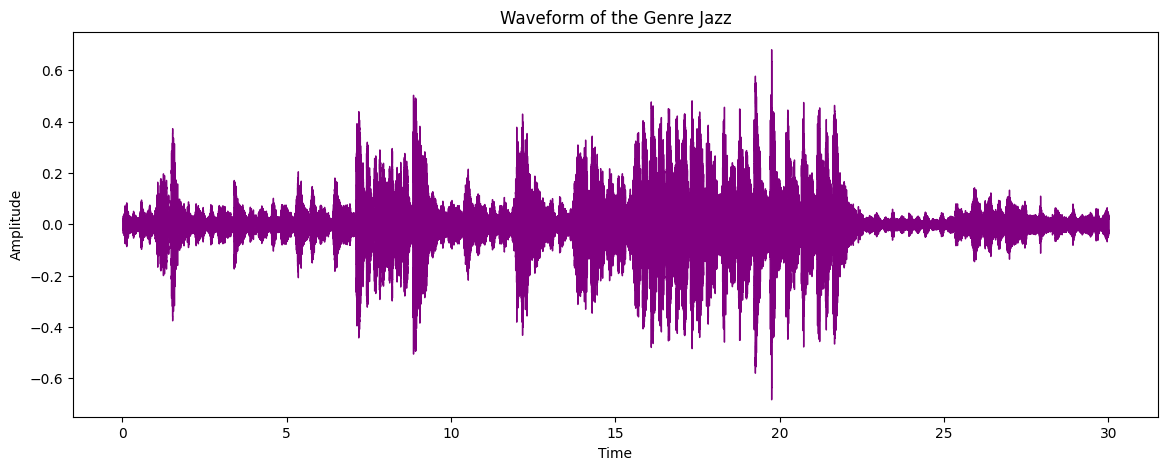

In [10]:
path = '/kaggle/input/gtzan-dataset-music-genre-classification/Data/genres_original/jazz/jazz.00000.wav'
plt.figure(figsize=(14, 5))
x, sr = librosa.load(path)
librosa.display.waveshow(x, sr=sr, color='purple')

plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Waveform of the Genre Jazz')
plt.show()

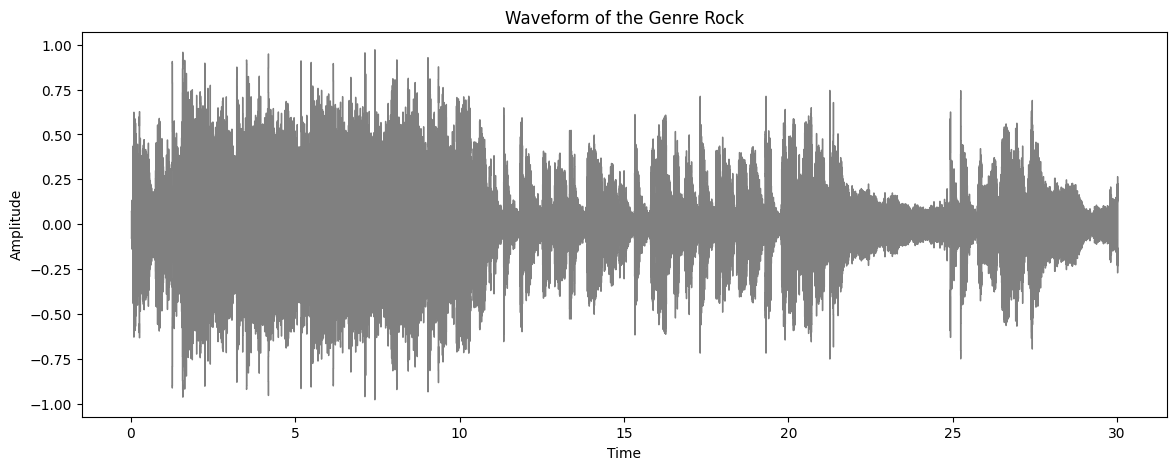

In [9]:
path = '/kaggle/input/gtzan-dataset-music-genre-classification/Data/genres_original/rock/rock.00000.wav'
plt.figure(figsize=(14, 5))
x, sr = librosa.load(path)
librosa.display.waveshow(x, sr=sr, color='grey')

plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Waveform of the Genre Rock')
plt.show()

# **Heatmap**

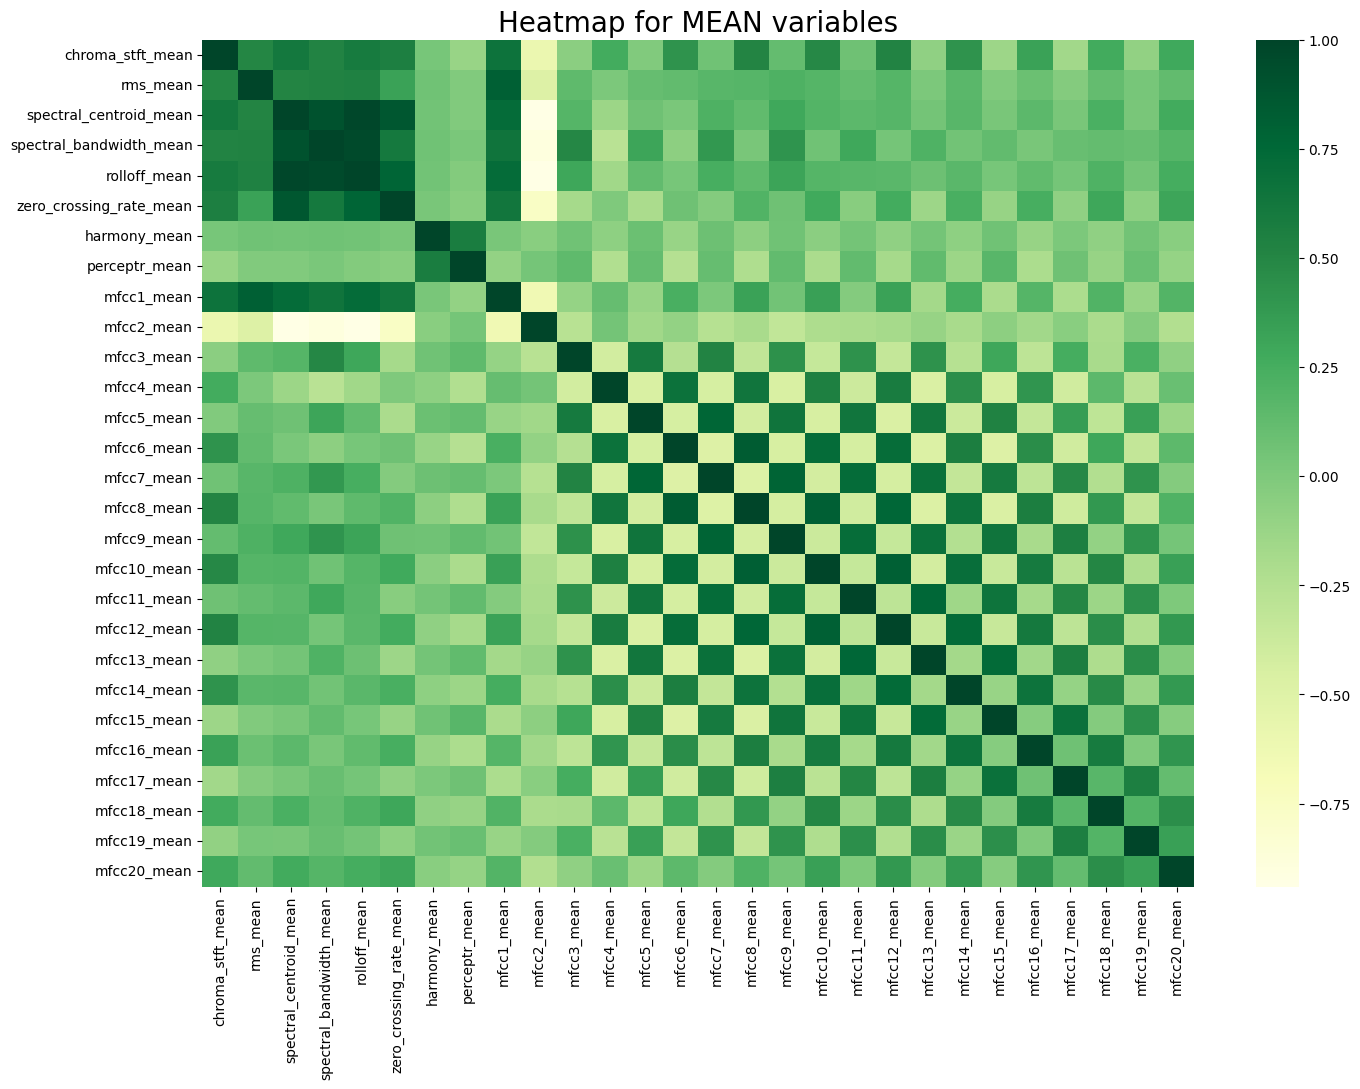

In [11]:
# Computing the Correlation Matrix
spike_cols = [col for col in music_data.columns if 'mean' in col]

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(16, 11));

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(music_data[spike_cols].corr(), cmap='YlGn')

plt.title('Heatmap for MEAN variables', fontsize = 20)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10);


# **Spectrogram**

/tmp/ipykernel_32/4264169119.py:4: UserWarning: Trying to display complex-valued input. Showing magnitude instead.
  librosa.display.specshow(stft, sr=sr, x_axis = 'time', y_axis = 'hz')


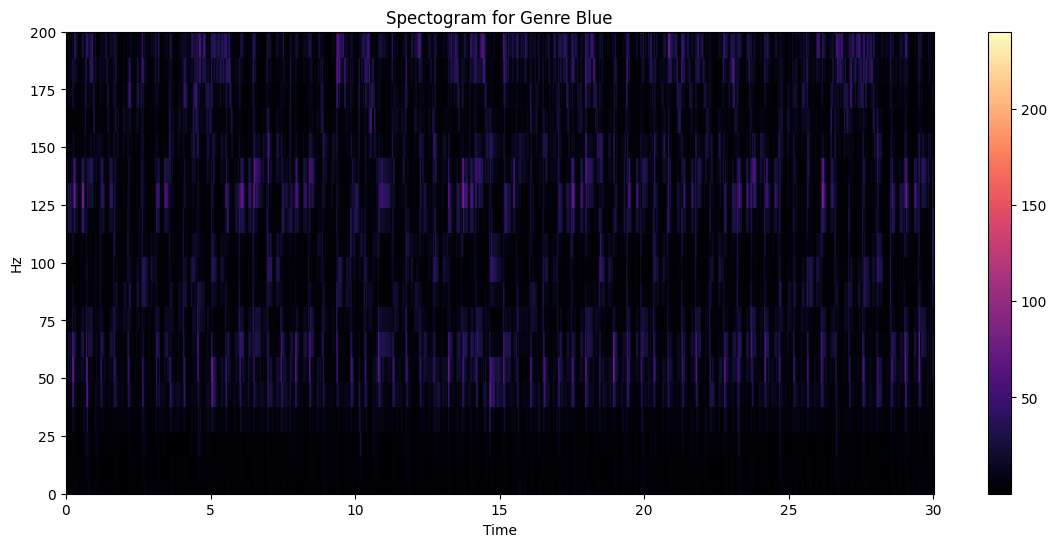

In [12]:
stft = librosa.stft(data)
stft_db = librosa.amplitude_to_db(abs(stft))
plt.figure(figsize =(14, 6))
librosa.display.specshow(stft, sr=sr, x_axis = 'time', y_axis = 'hz')
plt.ylim(0, 200)
plt.title('Spectogram for Genre Blue')
plt.colorbar()

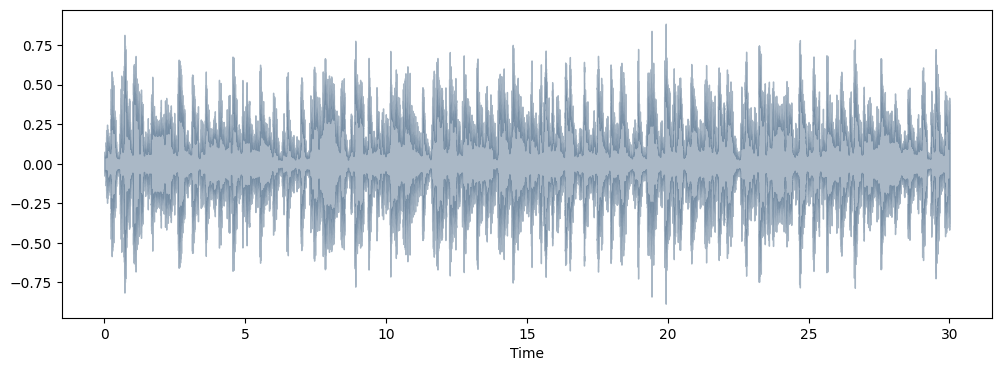

In [13]:
spectral_rolloff = librosa.feature.spectral_rolloff(y = data, sr=sr)[0]
plt.figure(figsize = (12, 4))
librosa.display.waveshow(data, sr=sr, alpha = 0.4, color = "#2B4F72")

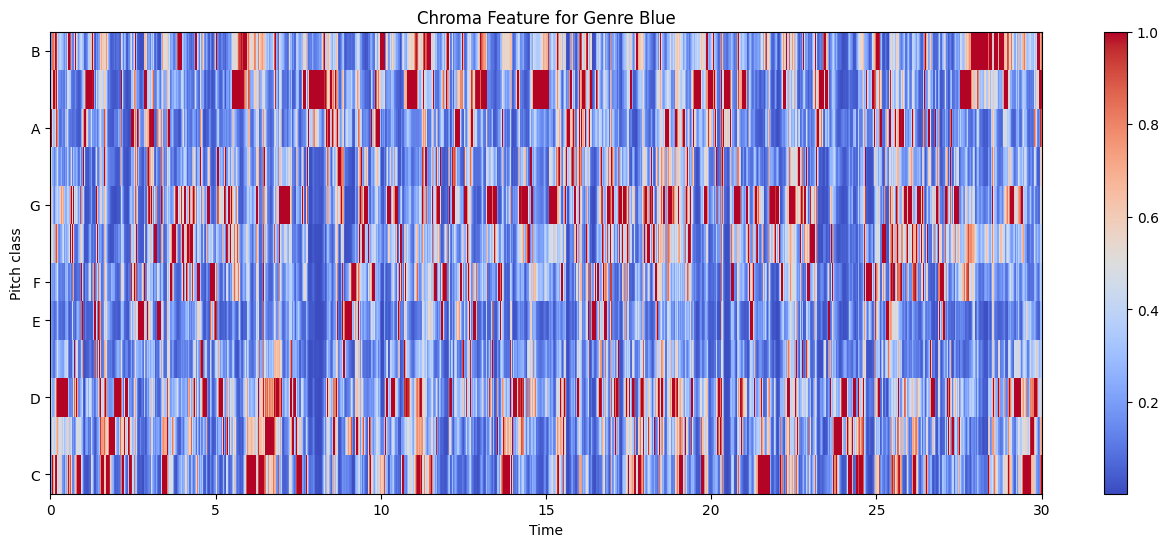

In [14]:
chroma = librosa.feature.chroma_stft(y = data, sr = sr)
plt.figure(figsize = (16,6))
librosa.display.specshow(chroma, sr = sr, x_axis='time', y_axis='chroma', cmap='coolwarm')
plt.colorbar()
plt.title('Chroma Feature for Genre Blue')
plt.show()

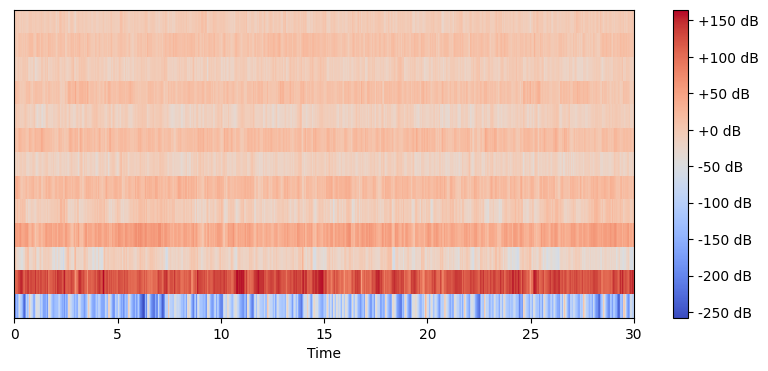

In [15]:
mfccs = librosa.feature.mfcc(y=data, sr=sr, n_mfcc=13)

# Display the MFCCs
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfccs, x_axis='time', sr=sr)
plt.colorbar(format='%+2.0f dB')
plt.show()

In [33]:
#define a function to get distance between feature vectors and find neighbors
def getNeighbors(trainingset, instance, k):
    distances = []
    for x in range(len(trainingset)):
        dist = distance(trainingset[x], instance, k) + distance(instance,trainingset[x],k)
        distances.append((trainingset[x][2], dist))
    distances.sort(key=operator.itemgetter(1))
    neighbors = []
    for x in range(k):
        neighbors.append(distances[x][0])
    return neighbors

In [34]:
#function to identify the nearest neighbors
def nearestclass(neighbors):
    classVote = {}
    
    for x in range(len(neighbors)):
        response = neighbors[x]
        if response in classVote:
            classVote[response] += 1
        else:
            classVote[response] = 1
            
    sorter = sorted(classVote.items(), key=operator.itemgetter(1), reverse=True)
    return sorter[0][0]

In [35]:
def getAccuracy(testSet, prediction):
    correct = 0
    for x in range(len(testSet)):
        if testSet[x][-1] == prediction[x]:
            correct += 1
    return 1.0 * correct / len(testSet)

In [37]:
directory = '../input/gtzan-dataset-music-genre-classification/Data/genres_original'
f = open("mydataset.dat", "wb")
i = 0
for folder in os.listdir(directory):
    #print(folder)
    i += 1
    if i == 11:
        break
    for file in os.listdir(directory+"/"+folder):
        #print(file)
        try:
            (rate, sig) = wav.read(directory+"/"+folder+"/"+file)
            mfcc_feat = mfcc(sig, rate, winlen = 0.020, appendEnergy=False)
            covariance = np.cov(np.matrix.transpose(mfcc_feat))
            mean_matrix = mfcc_feat.mean(0)
            feature = (mean_matrix, covariance, i)
            pickle.dump(feature, f)
        except Exception as e:
            print("Got an exception: ", e, 'in folder: ', folder, ' filename: ', file)
f.close()

Got an exception:  File format b'\xcb\x15\x1e\x16' not understood. Only 'RIFF' and 'RIFX' supported. in folder:  jazz  filename:  jazz.00054.wav


In [38]:
dataset = []

def loadDataset(filename, split, trset, teset):
    with open('mydataset.dat','rb') as f:
        while True:
            try:
                dataset.append(pickle.load(f))
            except EOFError:
                f.close()
                break
    for x in range(len(dataset)):
        if random.random() < split:
            trset.append(dataset[x])
        else:
            teset.append(dataset[x])

trainingSet = []
testSet = []
file = '/kaggle/input/gtzan-dataset-music-genre-classification/Data/features_30_sec.csv'
loadDataset(file, 0.68, trainingSet, testSet)

In [39]:
def distance(instance1, instance2, k):
    distance = 0
    mm1 = instance1[0]
    cm1 = instance1[1]
    mm2 = instance2[0]
    cm2 = instance2[1]
    distance = np.trace(np.dot(np.linalg.inv(cm2), cm1))
    distance += (np.dot(np.dot((mm2-mm1).transpose(), np.linalg.inv(cm2)), mm2-mm1))
    distance += np.log(np.linalg.det(cm2)) - np.log(np.linalg.det(cm1))
    distance -= k
    return distance

In [40]:
# Make the prediction using KNN(K nearest Neighbors)
length = len(testSet)
predictions = []
for x in range(length):
    predictions.append(nearestclass(getNeighbors(trainingSet, testSet[x], 5)))

accuracy1 = getAccuracy(testSet, predictions)
print(accuracy1)

0.7014925373134329


In [41]:
from collections import defaultdict
results = defaultdict(int)

directory = "../input/gtzan-dataset-music-genre-classification/Data/genres_original"

i = 1
for folder in os.listdir(directory):
    results[i] = folder
    i += 1
    

pred = nearestclass(getNeighbors(dataset, feature, 5))
print(results[pred])

pop


In [42]:
test_dir = "/kaggle/input/gtzan-dataset-music-genre-classification/Data/genres_original/reggae/"
test_file = test_dir + "reggae.00060.wav"
print(test_file)


/kaggle/input/gtzan-dataset-music-genre-classification/Data/genres_original/reggae/reggae.00060.wav


In [44]:
(rate, sig) = wav.read(test_file)
mfcc_feat = mfcc(sig, rate, winlen = 0.020, appendEnergy=False)
covariance = np.cov(np.matrix.transpose(mfcc_feat))
mean_matrix = mfcc_feat.mean(0)
feature = (mean_matrix, covariance, i)

In [45]:
pred = nearestclass(getNeighbors(dataset, feature, 5))
print(results[pred])

reggae


# ***Prediction Gone Wrong***

In [49]:
import os
import librosa
import numpy as np
import tensorflow as tf
from tensorflow import keras

def preprocess_data(directory):
    data = []
    labels = []
    
    for folder in os.listdir(directory):
        label = folder
        folder_path = os.path.join(directory, folder)
        
        for file in os.listdir(folder_path):
            file_path = os.path.join(folder_path, file)
            # Load audio file and extract features (e.g., Mel spectrogram)
            audio, sample_rate = librosa.load("/kaggle/input/gtzan-dataset-music-genre-classification/Data/genres_original/classical/classical.00000.wav", res_type='kaiser_fast', duration=30)
            mel_spectrogram = librosa.feature.melspectrogram(y=audio, sr=sample_rate)
            mel_spectrogram = np.mean(mel_spectrogram, axis=1)  # Take the mean over time
            data.append(mel_spectrogram)
            labels.append(label)
    
    return np.array(data), np.array(labels)

data, labels = preprocess_data('../input/gtzan-dataset-music-genre-classification/Data/genres_original')

# Encode labels into integers
label_to_id = {label: i for i, label in enumerate(np.unique(labels))}
id_to_label = {i: label for label, i in label_to_id.items()}
labels = np.array([label_to_id[label] for label in labels])

# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

# Create a CNN model
model = keras.Sequential()
model.add(keras.layers.Input(shape=(X_train.shape[1],)))
model.add(keras.layers.Reshape(target_shape=(X_train.shape[1], 1)))
model.add(keras.layers.Conv1D(64, kernel_size=3, activation='relu'))
model.add(keras.layers.MaxPooling1D(pool_size=2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(len(label_to_id), activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_accuracy}')

# Make predictions
predictions = model.predict(X_test)
predicted_labels = np.argmax(predictions, axis=1)

# Decode integer labels to original genre labels
predicted_labels = [id_to_label[i] for i in predicted_labels]

# Function to extract audio features from a single file
def extract_features_single(file_path):
    audio, sample_rate = librosa.load(file_path, res_type='kaiser_fast', duration=30)
    mel_spectrogram = librosa.feature.melspectrogram(y=audio, sr=sample_rate)
    mel_spectrogram = np.mean(mel_spectrogram, axis=1)
    return mel_spectrogram

# Define the path to the new audio file you want to predict
new_audio_file = '/kaggle/input/gtzan-dataset-music-genre-classification/Data/genres_original/pop/pop.00006.wav'

# Extract features from the new audio file
new_audio_features = extract_features_single(new_audio_file)

# Reshape the features for prediction
new_audio_features = new_audio_features.reshape(1, -1)

# Make predictions using the trained model
predicted_genre_id = model.predict(new_audio_features)
predicted_genre = id_to_label[np.argmax(predicted_genre_id)]

print(f'Predicted Genre: {predicted_genre}')



Epoch 1/10
25/25 [==============================] - 1s 16ms/step - loss: 2.3283 - accuracy: 0.1037 - val_loss: 2.3276 - val_accuracy: 0.0650
Epoch 2/10
25/25 [==============================] - 0s 11ms/step - loss: 2.3072 - accuracy: 0.0875 - val_loss: 2.3099 - val_accuracy: 0.0750
Epoch 3/10
25/25 [==============================] - 0s 9ms/step - loss: 2.3037 - accuracy: 0.1063 - val_loss: 2.3156 - val_accuracy: 0.0750
Epoch 4/10
25/25 [==============================] - 0s 9ms/step - loss: 2.3034 - accuracy: 0.1050 - val_loss: 2.3091 - val_accuracy: 0.0750
Epoch 5/10
25/25 [==============================] - 0s 9ms/step - loss: 2.3034 - accuracy: 0.0925 - val_loss: 2.3035 - val_accuracy: 0.1050
Epoch 6/10
25/25 [==============================] - 0s 9ms/step - loss: 2.3024 - accuracy: 0.1013 - val_loss: 2.3040 - val_accuracy: 0.0650
Epoch 7/10
25/25 [==============================] - 0s 10ms/step - loss: 2.3023 - accuracy: 0.1088 - val_loss: 2.3048 - val_accuracy: 0.0650
Epoch 8/10
25/25 

***Data Augmentation for Optimization***

In [58]:
from audiomentations import Compose, TimeStretch, PitchShift, Shift, PolarityInversion, AddGaussianNoise

augmentations = Compose([
    TimeStretch(min_rate=0.8, max_rate=1.2, p=0.5),
    PitchShift(min_semitones=-4, max_semitones=4, p=0.5),
    Shift(min_fraction=-0.5, max_fraction=0.5, p=0.5),
    PolarityInversion(p=0.1),
    AddGaussianNoise(min_amplitude=0.001, max_amplitude=0.015, p=0.5),
])

# Apply data augmentation to a single audio sample
augmented_sample = augmentations(samples=audio, sample_rate=sample_rate)


ModuleNotFoundError: No module named 'audiomentations'

In [62]:
import os
import librosa
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

# Load and preprocess your audio data and labels
data, labels = preprocess_data('/kaggle/input/gtzan-dataset-music-genre-classification/Data/genres_original')

# Encode labels into integers
label_to_id = {label: i for i, label in enumerate(np.unique(labels))}
id_to_label = {i: label for label, i in label_to_id.items()}
labels = np.array([label_to_id[label] for label in labels])

# Define the number of splits (e.g., 5 for 5-fold cross-validation)
n_splits = 5

# Initialize a list to store accuracy scores for each fold
accuracy_scores = []

# Create a KFold cross-validation object
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Iterate through the folds
for train_index, test_index in kf.split(data):
    X_train, X_test = data[train_index], data[test_index]
    y_train, y_test = labels[train_index], labels[test_index]

    # Create a new model for each fold
    model = keras.Sequential()
    model.add(keras.layers.Input(shape=(X_train.shape[1],)))
    model.add(keras.layers.Reshape(target_shape=(X_train.shape[1], 1)))
    model.add(keras.layers.Conv1D(64, kernel_size=3, activation='relu'))
    model.add(keras.layers.MaxPooling1D(pool_size=2))
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(128, activation='relu'))
    model.add(keras.layers.Dense(len(label_to_id), activation='softmax'))

    # Compile the model
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # Train the model
    model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)  # verbose=0 for no output

    # Evaluate the model on the test set for this fold
    test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
    accuracy_scores.append(test_accuracy)

# Calculate and print the mean accuracy across all folds
mean_accuracy = np.mean(accuracy_scores)
print(f'Mean Cross-Validation Accuracy: {mean_accuracy:.4f}')

# Optional: You can save the trained model with the best performance if needed
best_fold = accuracy_scores.index(max(accuracy_scores))
model.save(f'best_model_fold{best_fold}.h5')


Mean Cross-Validation Accuracy: 0.0590
